In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [34]:
path = 'ex1data1.txt'
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])
data.head() #读前5行

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


<function matplotlib.pyplot.show>

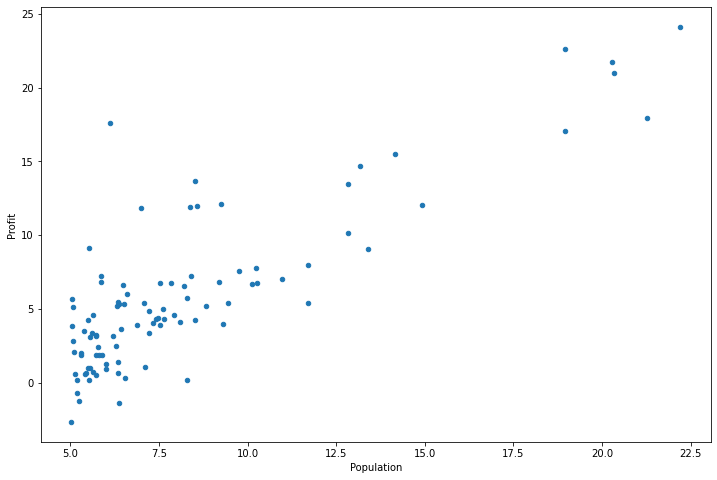

In [35]:
data.plot(kind='scatter', x='Population', y= 'Profit', figsize=(12,8) )
plt.show

In [36]:
def computeCost (X,y,theta):
    inner=np.power((X*theta.T)-y,2)  
    #theta.T就是矩阵theta的转置矩阵
    #np.power(A,B)   ## 对A中的每个元素求B次方
    return np.sum(inner)/(2*len(X))

In [37]:
data.insert(0, 'one', 1)


In [38]:
cols = data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]

In [39]:
X.head()

,one,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [40]:
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0,0]))

In [41]:
computeCost(X, y, theta)

32.072733877455676

In [42]:
def gradientDescent(X, y, theta, alpba, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters= int(theta.ravel().shape[1])
    cost = np.zeros(iters)

    for i in range(iters):
        error = (X*theta.T) - y
        for j in range(parameters):
            term = np.multiply(error, X[:, j])
            temp[0, j] = theta[0, j] - ((alpba/len(X)))*np.sum(term)

        theta = temp
        cost[i] = computeCost(X, y, theta)+alpba*(theta*theta.T-1)

    return theta, cost

In [43]:
alpha = 0.01
iters = 1000

In [44]:
g, cost = gradientDescent(X, y, theta, alpha, iters)

cost

array([6.73149242, 5.92756227, 5.89745046, 5.89158652, 5.88646794,
       5.88138464, 5.87631993, 5.87127424, 5.8662477 , 5.86124028,
       5.85625192, 5.85128253, 5.84633206, 5.84140044, 5.83648759,
       5.83159345, 5.82671794, 5.821861  , 5.81702256, 5.81220255,
       5.8074009 , 5.80261755, 5.79785242, 5.79310545, 5.78837657,
       5.78366572, 5.77897283, 5.77429783, 5.76964065, 5.76500123,
       5.76037951, 5.75577541, 5.75118888, 5.74661985, 5.74206824,
       5.73753401, 5.73301708, 5.72851739, 5.72403488, 5.71956948,
       5.71512113, 5.71068977, 5.70627533, 5.70187775, 5.69749697,
       5.69313292, 5.68878555, 5.68445479, 5.68014058, 5.67584286,
       5.67156157, 5.66729664, 5.66304802, 5.65881565, 5.65459947,
       5.65039941, 5.64621541, 5.64204742, 5.63789538, 5.63375923,
       5.62963891, 5.62553436, 5.62144552, 5.61737233, 5.61331474,
       5.60927268, 5.60524611, 5.60123496, 5.59723918, 5.5932587 ,
       5.58929348, 5.58534345, 5.58140856, 5.57748875, 5.57358

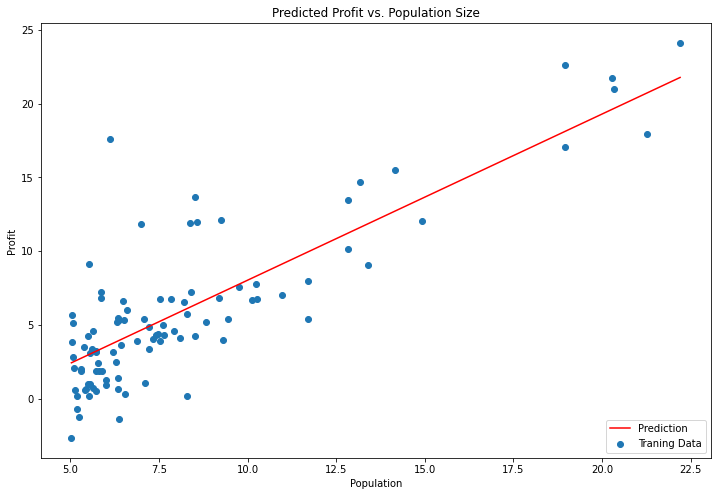

In [45]:
x = np.linspace(data.Population.min(),data.Population.max(),100)#以人口最小值为起点，最大值为终点，创建元素个数为100的等差数列
f = g[0,0] + (g[0,1] * x) #f是假设函数H

fig, ax = plt.subplots(figsize=(12,8))#以其他关键字参数**fig_kw来创建图
#figsize=(a,b):figsize 设置图形的大小,b为图形的宽,b为图形的高,单位为英寸
ax.plot(x, f, 'r', label='Prediction')   #设置点的横坐标，纵坐标，用红色线，并且设置Prediction为关键字参数
ax.scatter(data.Population, data.Profit, label='Traning Data')  #以人口为横坐标，利润为纵坐标并且设置Traning Data为关键字参数
ax.legend(loc=4)  #legend为显示图例函数，loc为设置图例显示的位置，loc=2即在左上方
ax.set_xlabel('Population')  #设置x轴变量
ax.set_ylabel('Profit')  #设置x轴变量
ax.set_title('Predicted Profit vs. Population Size') #设置表头
plt.show()

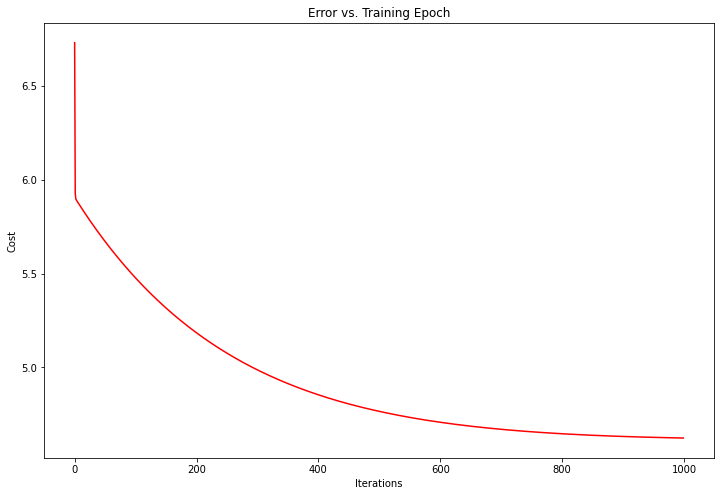

In [46]:
fig, ax = plt.subplots(figsize=(12,8)) #以其他关键字参数**fig_kw来创建图
#figsize=(a,b):figsize 设置图形的大小,b为图形的宽,b为图形的高,单位为英寸
ax.plot(np.arange(iters), cost, 'r') #作图:以迭代次数为x，代价函数值为y,线条颜色为红色
ax.set_xlabel('Iterations')  #设置x轴变量
ax.set_ylabel('Cost')  #设置y轴变量
ax.set_title('Error vs. Training Epoch') #设置表头
plt.show()

In [47]:
data2= pd.read_csv('ex1data2.txt',names=['square','bedrooms','price']) 
data2.head()

,square,bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [48]:
data2 = (data2 - data2.mean()) / data2.std()
data2.head()

,square,bedrooms,price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [49]:
# add ones column
data2.insert(0, 'Ones', 1)#在第0列插入表头为“ONE”的列，数值为1

# set X (training data) and y (target variable)
cols = data2.shape[1]  #获取表格df的列数
X2 = data2.iloc[:,0:cols-1]#除最后一列外，取其他列的所有行，即X2为O，面积，卧室数组成的列表
y2 = data2.iloc[:,cols-1:cols]#取最后一列的所有行，即y2为利润

# convert to matrices and initialize theta
X2 = np.matrix(X2.values)  #转换为矩阵
y2 = np.matrix(y2.values)  #转换为矩阵
theta2 = np.matrix(np.array([0,0,0]))

# perform linear regression on the data set
g2, cost2 = gradientDescent(X2, y2, theta2, alpha, iters)

# get the cost (error) of the model
computeCost(X2, y2, g2)   #计算代价函数

0.13070336960771892

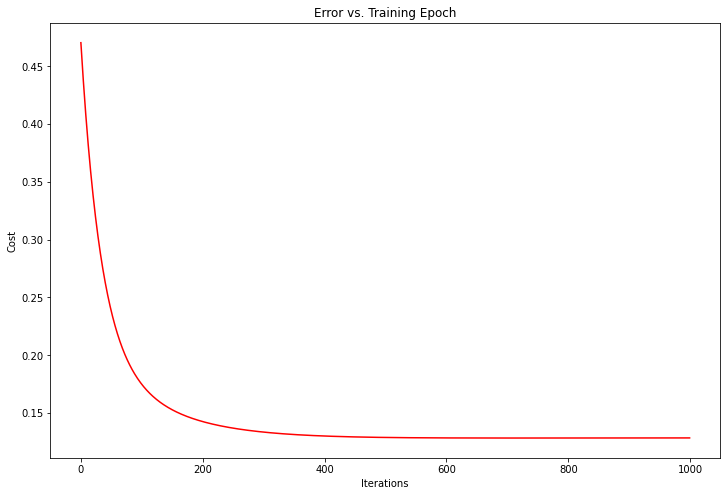

In [50]:
fig, ax = plt.subplots(figsize=(12,8))#以其他关键字参数**fig_kw来创建图
#figsize=(a,b):figsize 设置图形的大小,b为图形的宽,b为图形的高,单位为英寸
ax.plot(np.arange(iters), cost2, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.show()

In [51]:
from sklearn import linear_model  #从sklearn库中引入线性模块 
model = linear_model.LinearRegression()  #声明对象为线性回归模型
model.fit(X, y)   

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

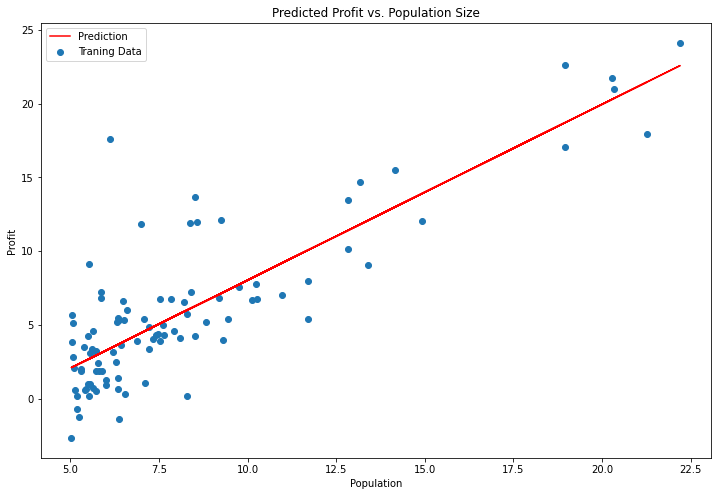

In [52]:
x = np.array(X[:, 1].A1)
f = model.predict(X).flatten() #将model.predict(X)中的数据降为一维，并返回源数据的副本

fig, ax = plt.subplots(figsize=(12,8))#以其他关键字参数**fig_kw来创建图
#figsize=(a,b):figsize 设置图形的大小,b为图形的宽,b为图形的高,单位为英寸
ax.plot(x, f, 'r', label='Prediction')   #设置点的横坐标，纵坐标，用红色线，并且设置Prediction为关键字参数
ax.scatter(data.Population, data.Profit, label='Traning Data')  #以人口为横坐标，利润为纵坐标并且设置Traning Data为关键字参数
ax.legend(loc=2)  #legend为显示图例函数，loc为设置图例显示的位置，loc=2即在左上方
ax.set_xlabel('Population')  #设置x轴变量
ax.set_ylabel('Profit')  #设置x轴变量
ax.set_title('Predicted Profit vs. Population Size') #设置表头
plt.show()